In [1]:
import pandas as pd

In [3]:
mcdonalds_data=pd.read_csv('/content/mcdonalds.csv')
mcdonalds_data.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [10]:
# Check for missing values in each DataFrame

print("missing values:\n", mcdonalds_data.isnull().sum())



Gender missing values:
 0
Like missing values:
 0
missing values:
 yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


Distribution of 'VisitFrequency' and 'Like'

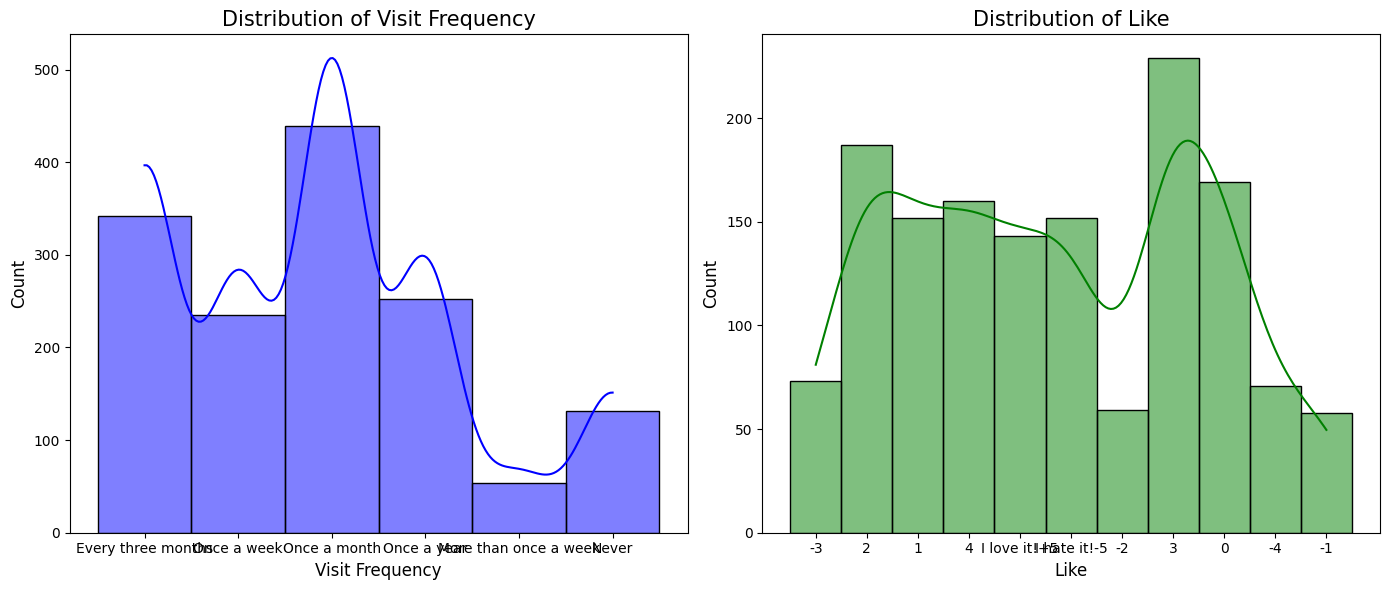

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(mcdonalds_data['VisitFrequency'], bins=20, kde=True, color='blue')
plt.title("Distribution of Visit Frequency", fontsize=15)
plt.xlabel("Visit Frequency", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(mcdonalds_data['Like'], bins=20, kde=True, color='green')
plt.title("Distribution of Like", fontsize=15)
plt.xlabel("Like", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


Pairplot for more detailed analysis:



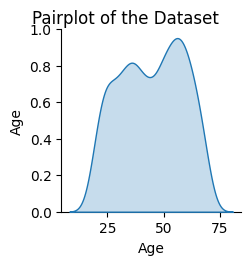

In [14]:
sns.pairplot(mcdonalds_data, diag_kind='kde')
plt.suptitle("Pairplot of the Dataset", y=1.02)
plt.show()


The dataset has been loaded successfully and contains several columns with information about McDonald's customers, their perceptions of various attributes, and demographic information. Here's a summary of the dataset:

Attributes: 'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'
Feedback: 'Like'
Demographics: 'Age', 'VisitFrequency', 'Gender'
Next, I'll replicate a part of the notebook by performing K-means clustering on the dataset and visualizing the results. Let's proceed with the following steps:

Convert categorical variables to numerical values.
Perform K-means clustering.
Visualize the clusters using scatter plots.
Let's start by converting the categorical variables.

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Convert categorical variables to numerical values
categorical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender', 'VisitFrequency']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    mcdonalds_data[column] = label_encoder.fit_transform(mcdonalds_data[column])

# Display the first few rows of the transformed dataset
print(mcdonalds_data.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting Like  Age  VisitFrequency  Gender  
0        0           0   -3   61               0       0  
1        0           0    2   51               0       0  
2        1           0    1   62               0       0  
3        0           1    4   69               4       0  
4        1           0    2   49               3       1  


Perform K-means Clustering

In [16]:
from sklearn.cluster import KMeans

# Select relevant columns for clustering
clustering_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender']

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
mcdonalds_data['cluster_num'] = kmeans.fit_predict(mcdonalds_data[clustering_columns])

# Display the first few rows of the dataset with cluster assignments
print(mcdonalds_data.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting Like  Age  VisitFrequency  Gender  cluster_num  
0        0           0   -3   61               0       0            2  
1        0           0    2   51               0       0            1  
2        1           0    1   62               0       0            1  
3        0           1    4   69               4       0            0  
4        1           0    2   49               3       1            2  


Visualize the Clusters Using Scatter Plots

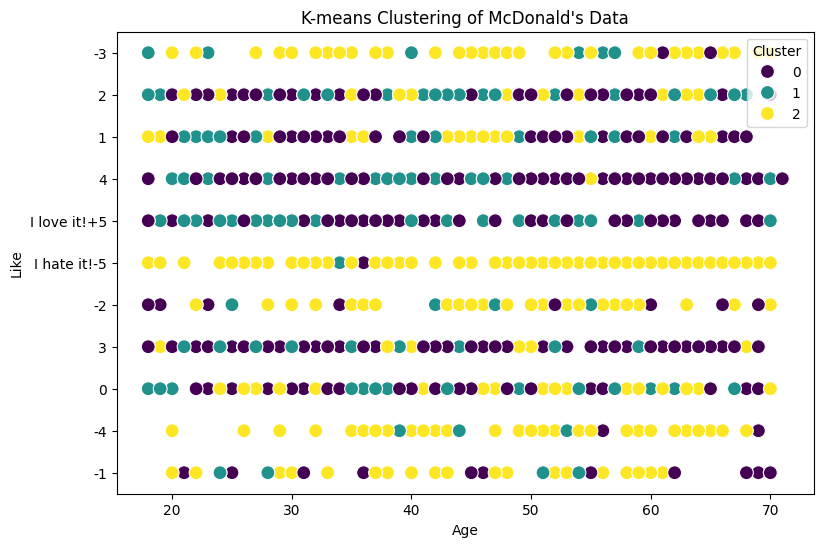

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters using a scatter plot
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Age', y='Like', hue='cluster_num', data=mcdonalds_data, palette='viridis', s=100)
plt.title("K-means Clustering of McDonald's Data")
plt.xlabel("Age")
plt.ylabel("Like")
plt.legend(title='Cluster')
plt.show()


Visualize Cluster Centers

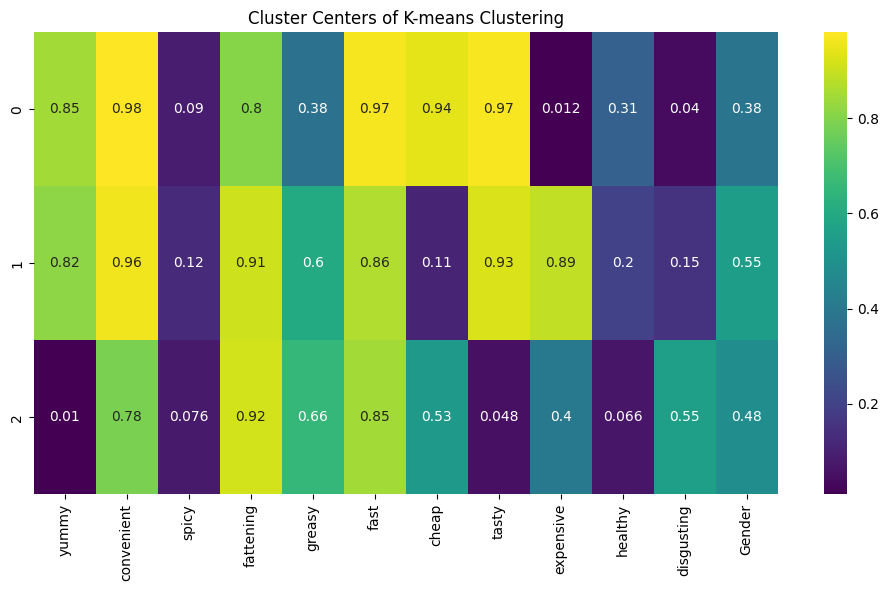

In [18]:
# Extract the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame for the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=clustering_columns)

# Visualize the cluster centers
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_centers_df, annot=True, cmap='viridis')
plt.title("Cluster Centers of K-means Clustering")
plt.show()


In [19]:
# Function to convert 'Like' column to numeric, ignoring non-numeric values
def clean_like_column(value):
    try:
        return float(value)
    except ValueError:
        return None

# Apply the function to the 'Like' column
mcdonalds_data['Like'] = mcdonalds_data['Like'].apply(clean_like_column)

# Remove rows with non-numeric 'Like' values
mcdonalds_data = mcdonalds_data.dropna(subset=['Like'])

# Convert 'VisitFrequency' to numeric values using LabelEncoder
mcdonalds_data['VisitFrequency'] = label_encoder.fit_transform(mcdonalds_data['VisitFrequency'])

# Display the cleaned data
print(mcdonalds_data.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age  VisitFrequency  Gender  cluster_num  
0        0           0  -3.0   61               0       0            2  
1        0           0   2.0   51               0       0            1  
2        1           0   1.0   62               0       0            1  
3        0           1   4.0   69               4       0            0  
4        1           0   2.0   49               3       1            2  


<ipython-input-19-898054a8e059>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdonalds_data['VisitFrequency'] = label_encoder.fit_transform(mcdonalds_data['VisitFrequency'])


In [20]:
# Perform K-means clustering with the cleaned data
kmeans = KMeans(n_clusters=3, random_state=42)
mcdonalds_data['cluster_num'] = kmeans.fit_predict(mcdonalds_data[clustering_columns])

# Display the first few rows of the dataset with cluster assignments
print(mcdonalds_data.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age  VisitFrequency  Gender  cluster_num  
0        0           0  -3.0   61               0       0            1  
1        0           0   2.0   51               0       0            2  
2        1           0   1.0   62               0       0            0  
3        0           1   4.0   69               4       0            2  
4        1           0   2.0   49               3       1            1  


Visualize Clusters in 3D

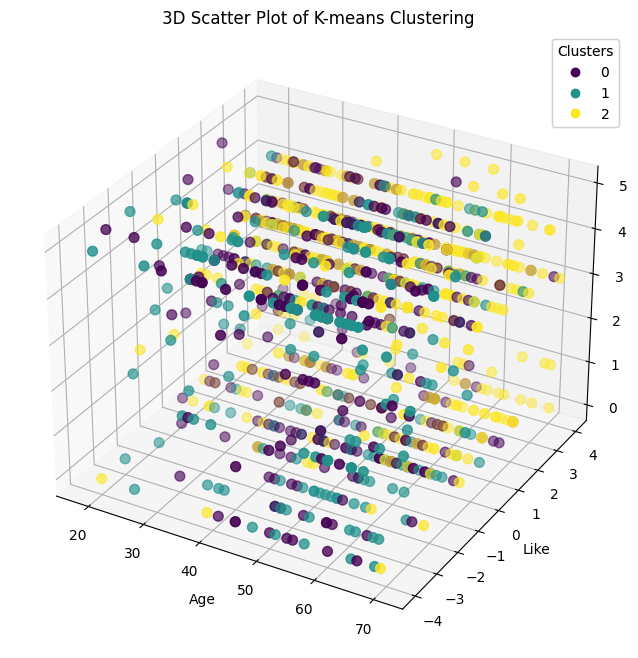

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot of the clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(mcdonalds_data['Age'], mcdonalds_data['Like'], mcdonalds_data['VisitFrequency'], c=mcdonalds_data['cluster_num'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Like')
ax.set_zlabel('VisitFrequency')
ax.set_title("3D Scatter Plot of K-means Clustering")
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()


Generate a Correlation Matrix

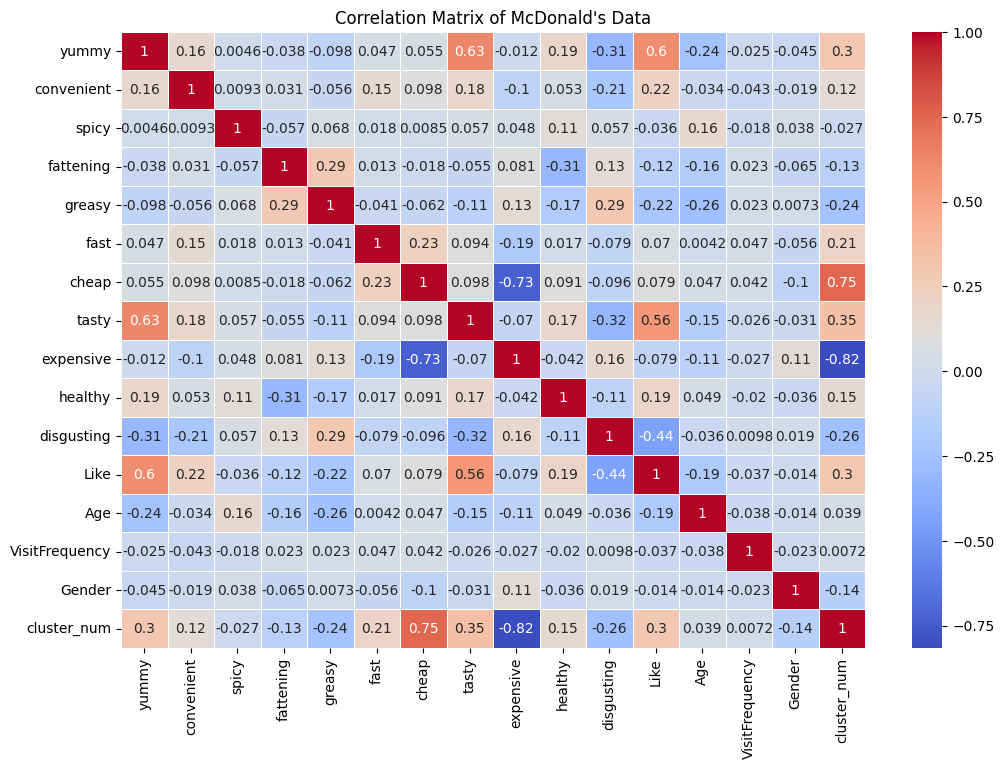

In [ ]:
# Generate a correlation matrix
correlation_matrix = mcdonalds_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of McDonald's Data")
plt.show()


Evaluate Cluster Quality using Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(mcdonalds_data[clustering_columns], mcdonalds_data['cluster_num'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.19299857245859153


Additional Pair Plot for Detailed Visualization

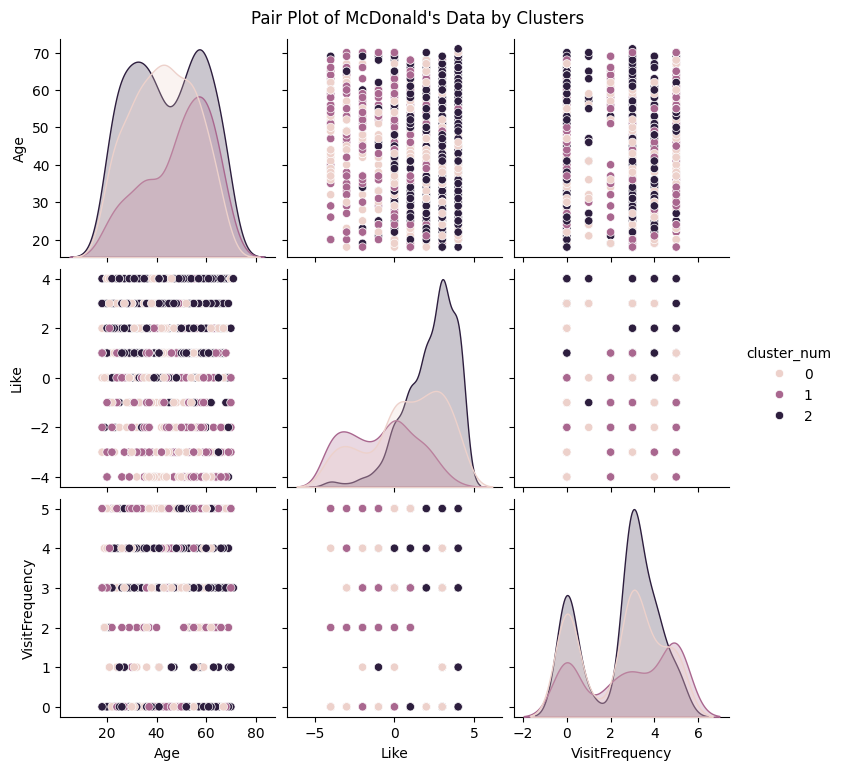

In [ ]:
# Pair plot of the dataset colored by cluster
sns.pairplot(mcdonalds_data, hue='cluster_num', vars=['Age', 'Like', 'VisitFrequency'])
plt.suptitle("Pair Plot of McDonald's Data by Clusters", y=1.02)
plt.show()
